In [38]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits

### open the FITS file

In [39]:
fname = "HorseHead.fits"
hdu_list = fits.open(fname)
hdu_list.info()


Filename: HorseHead.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     161   (891, 893)   int16   
  1  er.mask       1 TableHDU        25   1600R x 4C   [F6.2, F6.2, F6.2, F6.2]   


### Generally, the image information is located in the primary block. The blocks are numbered and can be accessed by indexing hdu_list

In [40]:
image_data = hdu_list[0].data

### our data is now stored as a 2D numpy array. But how do we know the dimensions of the image? We can simply look at the shape of the array

In [41]:
print(type(image_data))
print(image_data.shape)

<class 'numpy.ndarray'>
(893, 891)


### At this point, we can close the FITS file because we've stored everything we wanted to a variable

In [42]:
hdu_list.close()

### Shortcut: use "getdata()" to read in the image data and close the file.

In [43]:
image_data = fits.getdata(fname)
print(type(image_data))
print(image_data.shape)

<class 'numpy.ndarray'>
(893, 891)


### Show the data

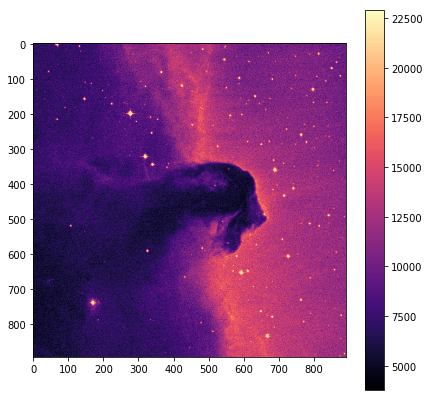

In [44]:
fig = plt.figure(figsize=(7,7))
plt.imshow(image_data, cmap='magma')
plt.colorbar()

### Lets get some basic stats about our image:

In [45]:
print('Min:', np.min(image_data))
print('Max:', np.max(image_data))
print('Mean:', np.mean(image_data))
print('Stdev:', np.std(image_data))

Min: 3759
Max: 22918
Mean: 9831.481676287574
Stdev: 3032.3927542049046


### Plotting a histogram
to make a histogram with matplotlib.pyplot.hist(), we'll need to cast the data from a 2D array to something one dimensional
In this case, let's use the ndarray.flatten() to return a 1D numpy array.

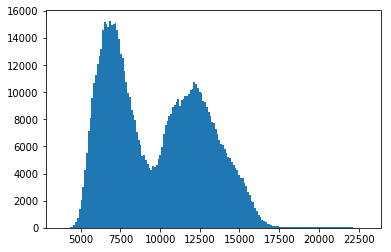

In [46]:
histogram = plt.hist(image_data.flatten(), bins = 'auto')

### Displaying the image with a logarithmic scale
What if we want to use a logarithmic color scale? To do so, we can load the LogNorm object from matplotlib

In [47]:
from matplotlib.colors import LogNorm

[Text(1, 0, '5,000'), Text(1, 0, ' 10,000'), Text(1, 0, '20,000')]

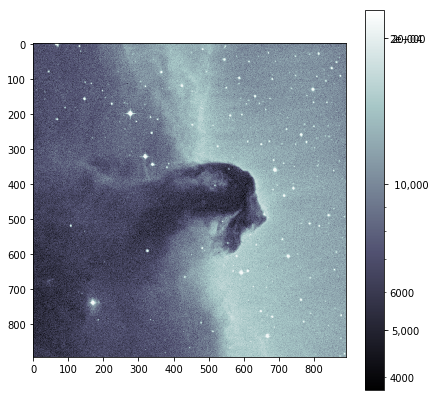

In [48]:
fig = plt.figure(figsize=(7,7))
plt.imshow(image_data, cmap='bone', norm=LogNorm())

#choose the tick marks based on the histogram above
cbar = plt.colorbar(ticks= [5.e3, 1.e4, 2.e4])
cbar.ax.set_yticklabels(['5,000', ' 10,000', '20,000'])

### Stacking Images
since the noise in an image results from a random process, we use stacking of seperate images to improve the signal to noise ratio of objects we observe. Here we are going to stack 5 images of M13 taken with a 10 in telescope

In [49]:
#make a list of filenames
image_list = ['M13_blue_0001.fits', 'M13_blue_0002.fits', 'M13_blue_0003.fits', 'M13_blue_0004.fits', 'M13_blue_0005.fits']

In [50]:
#make an array of images from the list of images
image_concat = [fits.getdata(image) for image in image_list]

In [51]:
final_image = np.sum(image_concat, axis=0)

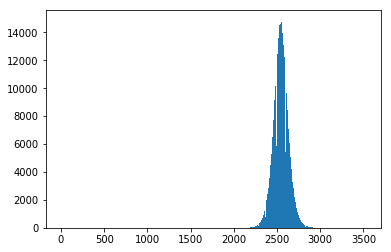

In [52]:
#plot a histogram of the image pixel values
image_hist = plt.hist(final_image.flatten(), bins='auto')

(0, 3500)

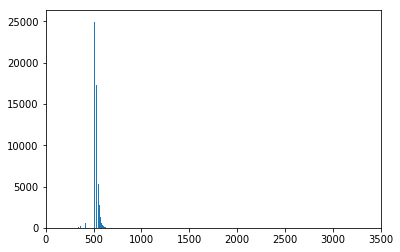

In [53]:
image_hist = plt.hist(image_concat[0].flatten(), bins='auto')
plt.xlim([0, 3500])

### We'll use the keywords vmin and vmax to set limits on the color scaling for imshow

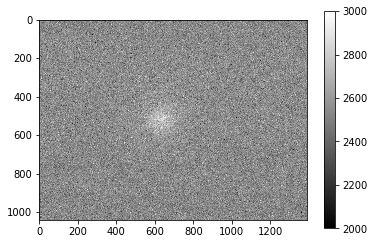

In [54]:
plt.imshow(final_image, cmap='gray', vmin=2E3, vmax = 3E3)
plt.colorbar()

In [55]:
### Writing a new FITS file

In [56]:
outfile = 'stacked_M13_blue.fits'
hdu = fits.PrimaryHDU(final_image)
hdu.writeto(outfile, overwrite =True)

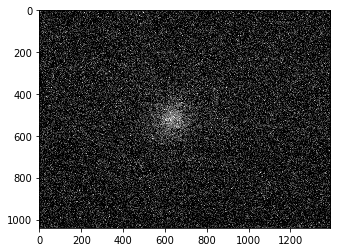

In [57]:
hdu_list = fits.open(outfile)
header = hdu_list[0].header
data = hdu_list[0].data
plt.imshow(data, cmap='gray', vmin=2.5e3, vmax=3e3)